# 시계열 분석 (Time Series)

* 시간 ! : 특정 간격 갖는 시간 (Lag)
    - Lag에서 Data의 Trend를 찾는다!
    
* 일변량 정상시계열
    - ARIMA

* Trend : 추세  
* Seasonality : 계절성  
* Cycle : 주기  
* Noise : 잡음 (시간에 따라 독립적인 데이터 평균이나 분산이 일정한 값)
    -> White Noise

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rc('font',family='Malgun Gothic')

In [2]:
df1 = pd.read_csv('Data11.csv')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 803675 entries, 0 to 803674
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   구매일     803675 non-null  object
 1   구매금액    803675 non-null  int64 
 2   물품대분류   803675 non-null  object
dtypes: int64(1), object(2)
memory usage: 18.4+ MB


In [3]:
df1.head()

,구매일,구매금액,물품대분류
0,2018-04-20,57120,기저귀
1,2018-04-20,15900,더블하트
2,2018-04-20,7000,더블하트
3,2018-04-20,20900,더블하트
4,2018-05-06,26500,더블하트


In [4]:
df1.tail()

,구매일,구매금액,물품대분류
803670,2020-08-06,30960,더블하트
803671,2020-08-06,6640,더블하트
803672,2020-08-06,5600,더블하트
803673,2020-08-06,7840,더블하트
803674,2020-08-06,8500,기타


구매일 -> datetime

In [5]:
df1['Datetime'] = pd.to_datetime(df1['구매일'])

In [6]:
df1['Datetime'].describe()

C:\ananconda\envs\multi\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


count                  803675
unique                    589
top       2019-10-11 00:00:00
freq                    10500
first     2018-04-20 00:00:00
last      2020-08-07 00:00:00
Name: Datetime, dtype: object

In [7]:
df1['Year'] = df1['Datetime'].dt.year
df1['Month'] = df1['Datetime'].dt.month
df1['Week'] = df1['Datetime'].dt.week
df1['Day_of_week'] = df1['Datetime'].dt.day_name()

C:\ananconda\envs\multi\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [8]:
df1.head()

,구매일,구매금액,물품대분류,Datetime,Year,Month,Week,Day_of_week
0,2018-04-20,57120,기저귀,2018-04-20,2018,4,16,Friday
1,2018-04-20,15900,더블하트,2018-04-20,2018,4,16,Friday
2,2018-04-20,7000,더블하트,2018-04-20,2018,4,16,Friday
3,2018-04-20,20900,더블하트,2018-04-20,2018,4,16,Friday
4,2018-05-06,26500,더블하트,2018-05-06,2018,5,18,Sunday


시간데이터 (lineplot / pointplot)

KeyboardInterrupt: 

C:\ananconda\envs\multi\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ananconda\envs\multi\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


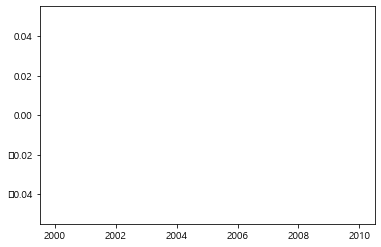

In [10]:
sns.lineplot(data=df1, x='Datetime', y='구매금액',estimator=sum)

---
pivot_table로 빠르게 함수를 적용하여 시각화할 수 있다.

In [12]:
p1 = pd.pivot_table(data=df1, index='Datetime', values='구매금액', aggfunc='sum').reset_index()

<AxesSubplot:xlabel='Datetime', ylabel='구매금액'>

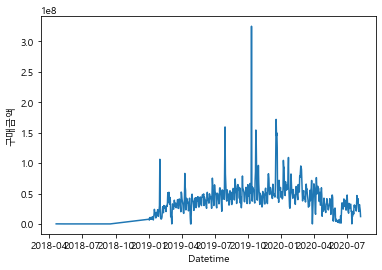

In [13]:
sns.lineplot(data=p1, x='Datetime', y='구매금액',estimator=sum)

In [17]:
p2 = pd.pivot_table(data=df1,
                    index=['Datetime','물품대분류'], 
                    values='구매금액', 
                    aggfunc='sum').reset_index()
p2

,Datetime,물품대분류,구매금액
0,2018-04-20,기저귀,57120
1,2018-04-20,더블하트,43800
2,2018-05-06,더블하트,26500
3,2018-05-14,FC,20600
4,2018-08-12,더블하트,75700
...,...,...,...
5241,2020-08-07,기타,182400
5242,2020-08-07,더블하트,408480
5243,2020-08-07,물티슈,100300
5244,2020-08-07,체험팩,112050


<AxesSubplot:xlabel='Datetime', ylabel='구매금액'>

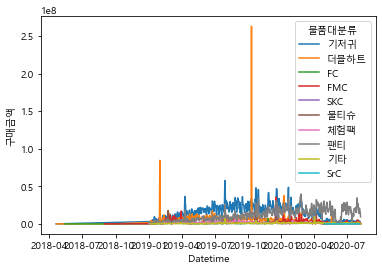

In [18]:
sns.lineplot(data=p2, x='Datetime', y='구매금액', estimator=sum, hue='물품대분류')

In [23]:
cond1 = df1.loc[df1['물품대분류']=='기저귀']
# 첫번째 데이터는 의미 없기 때문에 제거
df2 = cond1[1:]
df2

,구매일,구매금액,물품대분류,Datetime,Year,Month,Week,Day_of_week
29,2019-05-13,59520,기저귀,2019-05-13,2019,5,20,Monday
30,2019-05-10,50640,기저귀,2019-05-10,2019,5,19,Friday
31,2019-06-06,50640,기저귀,2019-06-06,2019,6,23,Thursday
32,2019-07-01,50640,기저귀,2019-07-01,2019,7,27,Monday
33,2019-07-29,101280,기저귀,2019-07-29,2019,7,31,Monday
...,...,...,...,...,...,...,...,...
803578,2020-06-25,43400,기저귀,2020-06-25,2020,6,26,Thursday
803602,2020-06-26,43400,기저귀,2020-06-26,2020,6,26,Friday
803610,2020-06-28,49900,기저귀,2020-06-28,2020,6,26,Sunday
803631,2020-07-09,49900,기저귀,2020-07-09,2020,7,28,Thursday


**ARIMA ( Auto Regressive Intergrated Moving Average Model )**

* AR(Auto Regressive Model) : 자기회귀모델
    - p 시점 전의 자료가 현재 시점의 데이터에 영향을 주는 자기회귀모델
    - ACF : 자기상관함수 / 특정 구간 내 데이터간 상관관계
    - PACF : 부분자기상관함수
    
* MA(Moving Average Model) : 이동평균모델
    - 일정한 구간 데이터의 평균을 계산해, 미래를 예측하는 모델 (불규칙적인 변동을 제거할 수 있음)
    
* Difference 차분 (데이터의 정상성을 잡아주는 모델)

**ARIMA Model 조건**

- 단기예측에 적합
- 계절적 변동요인 (주기적 변동이 있는 경우 사용)
- Sample > 50
- 정성적자료
    -> 차분

In [26]:
import statsmodels.tsa.api as tsa

In [33]:
df2.Datetime.sort_values()

690      2019-01-01
472      2019-01-01
907      2019-01-01
405      2019-01-01
361      2019-01-01
            ...    
96203    2020-08-07
774431   2020-08-07
704652   2020-08-07
468913   2020-08-07
67838    2020-08-07
Name: Datetime, Length: 141480, dtype: datetime64[ns]

* 일별로 합치기(index가 datetime인것이 좋다)

In [30]:
df_time = pd.pivot_table(data=df2, index='Datetime',
               values='구매금액', aggfunc='sum')
df_time.head()

,구매금액
Datetime,
2019-01-01,3051240
2019-01-02,2556280
2019-01-03,2729480
2019-01-04,2238440
2019-01-05,2478680


* 일주일 단위로 시계열 

In [40]:
# 일주일 단위로 구매금액의 평균
y = df_time['구매금액'].resample('1D').mean()

* missing value 확인

In [41]:
y.isnull().sum()

7

* 앞,뒤 자료의 데이터로 채운다.(결측치 처리) ffill : 앞데이터 / bfill : 전데이터

In [42]:
y1 = y.fillna(method='ffill')

* 시계열 분해
    - Trend (추세요인)
    - Seasonality (계절요인)
    - Cycle/Residual (불규칙 또는 순환 요인)

In [46]:
from pylab import rcParams

rcParams['figure.figsize']=15,10

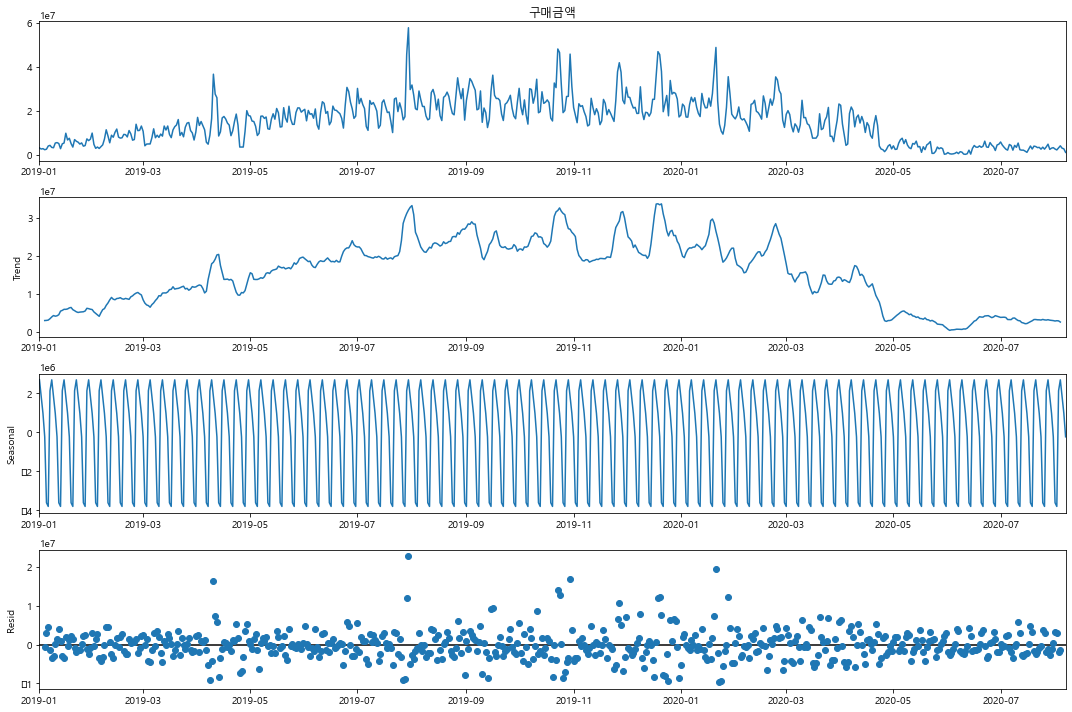

In [47]:
# 시계열 모델 생성
model_series = tsa.seasonal_decompose(y1, model='additive')

# 모델 시각화
fig = model_series.plot()
plt.show()

In [52]:
import itertools

In [53]:
p = d = q = range(0,2)
pdq = list(itertools.product(p,d,q))
seasonal_pdq = [(x[0],x[1],x[2], 12) for x in list(itertools.product(p,d,q))]

In [54]:
param_list = []
param_seasonal_list = []
results_AIC_list = []

In [60]:
for param in pdq:
     for param_seasonal in seasonal_pdq:
        try:
            mod = tsa.statespace.SARIMAX(y1,order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            param_list.append(param)
            param_seasonal_list.append(param_seasonal)
            results_AIC_list.append(results.aic)
        except:
             continue

In [61]:
ARIMA_list = pd.DataFrame({'Parameter':param_list,'Seasonal':param_seasonal_list,'AIC':results_AIC_list})
ARIMA_list.to_excel('arima_model_list.xlsx')

- **Likelihood (최대우도) : 특정 데이터가 모수로부터 추출되었을 가능도**
     - 특정 값에 대한 분포의 확률 추정 (연속 확률 밀도 함수 pdf의 y값)
     
- **AIC (Akaike Information Criterion) : 데이터에 대한 모델의 상대적 품질** 
    - AIC = -2 ln(L) + 2K
    - <u>값이 낮을 수록 모형 적합도가 높은것을 의미</u>
    
- **BIC (Bayes Information Criterion)**
    - BIC = -2 ln(L) + log(n)p
    - 변수가 더 많은 경우, AIC에 더 많은 패널티를 부여해 계산
    
- **HQIC (Hannan Quinn Information Criterion)**
    - HQIC = -2 ln(L) + 2k ln(ln(n))
    

In [64]:
ARIMA_list.sort_values(by='AIC').head()

,Parameter,Seasonal,AIC
43,"(1, 0, 1)","(0, 1, 1, 12)",18983.237154
47,"(1, 0, 1)","(1, 1, 1, 12)",18983.666910
23,"(0, 1, 0)","(1, 1, 1, 12)",19009.286110
63,"(1, 1, 1)","(1, 1, 1, 12)",19011.472166
59,"(1, 1, 1)","(0, 1, 1, 12)",19011.967429


In [65]:
mod = tsa.statespace.SARIMAX(y1,order=(1, 0, 1),seasonal_order=(1, 0, 1, 12),
                              enforce_stationarity=False, enforce_invertibility=False)
results = mod.fit()
print(results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                               구매금액   No. Observations:                  585
Model:             SARIMAX(1, 0, 1)x(1, 0, 1, 12)   Log Likelihood               -9657.064
Date:                            Fri, 25 Jun 2021   AIC                          19324.128
Time:                                    19:59:55   BIC                          19345.865
Sample:                                01-01-2019   HQIC                         19332.608
                                     - 08-07-2020                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5895      0.037     15.766      0.000       0.516       0.663
ma.L1          0.2724      0.045   

- Order (p,d,q), seasonal Order (P,D,Q,M)
    - p : AR에서의 p값 (p 구간 내 데이터 사이의 상관관계)
    - d : 차분
    - q : q MA PACF 편상관계수 q 값
    - P  
    - D
    - Q
    - M
- Ljung - Box Test : 일정 기간동안 관측치가 랜덤이고, 독립적인지 여부를 검정
     - 귀무 : 데이터가 상관관계를 나타내지 않는다.
     - 대립 : 데이터가 상관관계를 나타낸다.
     - p.value(귀무가설이 참일 확률) < 0.05 (유의수준) -> 대립가설 참
     
- Jarque Bera Test : 왜도와 첨도가 정규분포와 일지하는지 가설검정 (정규분포를 나타내었을 때 쏠림과 뾰족함)
    - SARIMAX : 잔차의 분포가 정규분포
    - 귀무 가설 : 해당 잔차(residual)는 정규분포와 일치한다.
    - 대립 가설 : 해당 잔차(residual)는 정규분포와 일치하지 않는다.
    - P.value < 0.05 , 해당 잔차(residual)는 정규분포와 일치하지 않는다.